# Analyzing FEMA Data on Wildfires

### In this notebook, I analyze data from OpenFEMA on disasters, public assistance, homeowners assistance and renters' assistance for all wildfires the agency has declared disasters. I use Python, Pandas, BeautifulSoup / requests, and a bit of exploratory data visualization in R - ggplot.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## The below code analyzes FEMA's Public Assistance Funded Projects Details dataset: https://www.fema.gov/openfema-data-page/public-assistance-funded-projects-details-v1

In [4]:
df_PA = pd.read_csv('PublicAssistanceFundedProjectsDetails.csv')
pd.set_option('display.max_columns', None)
df_PA.head()

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,state,stateCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id
0,4023,2011-09-02T00:00:00.000Z,Hurricane,247,MCMDG00 Trumbull Ave Revetment,009-47500-00,G - Recreational or Other,Large,New Haven,9.0,Connecticut,CT,9,614291.00,614291.00,614291.00,2012-04-05T00:00:00.000Z,G,Recreational or Other,2024-03-23T17:02:09.387Z,5ff26ea21f9af4de5dce40c1f4ab2324b11b5fcb,d247f735-5e5d-4d47-9b4b-58a2fa6396b4
1,4155,2013-11-08T00:00:00.000Z,Severe Storm,173,SG107 - Donated Resources,093-62100-00,B - Protective Measures,Small,Meade,93.0,South Dakota,SD,46,20739.92,16506.90,16506.90,2024-03-22T00:00:00.000Z,B,Protective Measures,2024-03-23T17:02:09.387Z,39a1559d2dd1a04afafdcde601838082c65b4729,39552c91-2dc1-4519-87fb-b6beb815a0ad
2,4337,2017-09-10T00:00:00.000Z,Hurricane,6679,Zoo Exhibit and Trail Repairs,099-UXTQE-00,"G - Parks, Recreational Facilities, and Other ...",Large,Palm Beach County,99.0,Florida,FL,12,137858.93,124077.54,124077.54,2020-01-24T00:00:00.000Z,G,"Parks, Recreational Facilities, and Other Items",2024-09-06T15:04:53.183Z,ab453e975b05cc11633455ccde7607fdd24ff1ca,98731455-3b88-4fc0-af7f-dae089378537
3,4480,2020-03-20T00:00:00.000Z,Biological,3023,**Project CLOSED** COVID-19 Non-Congregate She...,103-67059-00,B - Emergency Protective Measures,Small,Suffolk County,103.0,New York,NY,36,6001.93,6001.93,6001.93,2024-06-18T00:00:00.000Z,B,Emergency Protective Measures,2024-09-06T15:04:53.183Z,ed6a778c448feb9e7e76cbb162812fd757fed211,d23ffa21-c7cb-4acb-81f6-6f946bc27cb8
4,4488,2020-03-25T00:00:00.000Z,Biological,497,**Project CLOSED** St Paul Church and School E...,021-UTSTU-00,B - Emergency Protective Measures,Small,Mercer County,21.0,New Jersey,NJ,34,21126.51,21126.51,21126.51,2021-06-15T00:00:00.000Z,B,Emergency Protective Measures,2024-09-06T15:04:53.183Z,4bc9461a8667de98916dde9aa06c21ce1a6cc8ca,484a376d-fd16-4cab-8103-9d0570c49283


In [5]:
df_PA.dtypes

disasterNumber             int64
declarationDate           object
incidentType              object
pwNumber                   int64
applicationTitle          object
applicantId               object
damageCategoryCode        object
projectSize               object
county                    object
countyCode               float64
state                     object
stateCode                 object
stateNumberCode            int64
projectAmount            float64
federalShareObligated    float64
totalObligated           float64
obligatedDate             object
dcc                       object
damageCategory            object
lastRefresh               object
hash                      object
id                        object
dtype: object

In [6]:
df_PA.shape

(786367, 22)

In [7]:
df_PA['incidentType'].value_counts()

incidentType
Severe Storm                       305019
Hurricane                          237561
Flood                               69528
Biological                          37398
Snowstorm                           34472
Severe Storm(s)                     32362
Severe Ice Storm                    22942
Fire                                 7521
Tropical Storm                       7016
Other                                6968
Tornado                              5876
Earthquake                           4882
Typhoon                              4187
Winter Storm                         3968
Coastal Storm                        2839
Wildfire                             2258
Snow                                  485
Mud/Landslide                         408
Freezing                              199
Tsunami                               170
Terrorist                             105
Dam/Levee Break                        63
Volcano                                56
Chemical             

In [9]:
df_PA[df_PA['incidentType'] == 'Wildfire']['state'].value_counts()

state
California    1682
New Mexico     145
Colorado       139
Washington     133
Hawaii         120
Oklahoma        28
Montana         11
Name: count, dtype: int64

In [10]:
import re

df_PA['declarationYear'] = df_PA['declarationDate'].str.extract(r'(\d{4})')
#df.head()

In [13]:
df_PA['declarationMonth'] = df_PA['declarationDate'].str.extract(r'\d{4}-(\d\d)-')
df_PA.head()

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,state,stateCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id,declarationYear,declarationMonth
0,4023,2011-09-02T00:00:00.000Z,Hurricane,247,MCMDG00 Trumbull Ave Revetment,009-47500-00,G - Recreational or Other,Large,New Haven,9.0,Connecticut,CT,9,614291.00,614291.00,614291.00,2012-04-05T00:00:00.000Z,G,Recreational or Other,2024-03-23T17:02:09.387Z,5ff26ea21f9af4de5dce40c1f4ab2324b11b5fcb,d247f735-5e5d-4d47-9b4b-58a2fa6396b4,2011,09
1,4155,2013-11-08T00:00:00.000Z,Severe Storm,173,SG107 - Donated Resources,093-62100-00,B - Protective Measures,Small,Meade,93.0,South Dakota,SD,46,20739.92,16506.90,16506.90,2024-03-22T00:00:00.000Z,B,Protective Measures,2024-03-23T17:02:09.387Z,39a1559d2dd1a04afafdcde601838082c65b4729,39552c91-2dc1-4519-87fb-b6beb815a0ad,2013,11
2,4337,2017-09-10T00:00:00.000Z,Hurricane,6679,Zoo Exhibit and Trail Repairs,099-UXTQE-00,"G - Parks, Recreational Facilities, and Other ...",Large,Palm Beach County,99.0,Florida,FL,12,137858.93,124077.54,124077.54,2020-01-24T00:00:00.000Z,G,"Parks, Recreational Facilities, and Other Items",2024-09-06T15:04:53.183Z,ab453e975b05cc11633455ccde7607fdd24ff1ca,98731455-3b88-4fc0-af7f-dae089378537,2017,09
3,4480,2020-03-20T00:00:00.000Z,Biological,3023,**Project CLOSED** COVID-19 Non-Congregate She...,103-67059-00,B - Emergency Protective Measures,Small,Suffolk County,103.0,New York,NY,36,6001.93,6001.93,6001.93,2024-06-18T00:00:00.000Z,B,Emergency Protective Measures,2024-09-06T15:04:53.183Z,ed6a778c448feb9e7e76cbb162812fd757fed211,d23ffa21-c7cb-4acb-81f6-6f946bc27cb8,2020,03
4,4488,2020-03-25T00:00:00.000Z,Biological,497,**Project CLOSED** St Paul Church and School E...,021-UTSTU-00,B - Emergency Protective Measures,Small,Mercer County,21.0,New Jersey,NJ,34,21126.51,21126.51,21126.51,2021-06-15T00:00:00.000Z,B,Emergency Protective Measures,2024-09-06T15:04:53.183Z,4bc9461a8667de98916dde9aa06c21ce1a6cc8ca,484a376d-fd16-4cab-8103-9d0570c49283,2020,03


In [530]:
df_PA[df_PA['incidentType'] == 'Wildfire']['disasterNumber'].nunique()

16

In [14]:
(
    df_PA[df_PA['incidentType'] == 'Wildfire']
    .groupby('declarationYear')
    ['totalObligated'].sum()
)

declarationYear
2018    1.988088e+09
2020    6.908997e+08
2021    5.758147e+08
2022    1.939729e+08
2023    5.960464e+08
2024    1.949648e+06
Name: totalObligated, dtype: float64

## The below code reads in FEMA's Housing Assistance Program for Owners dataset: https://www.fema.gov/openfema-data-page/housing-assistance-program-data-owners-v2

In [15]:
df_owners = pd.read_csv('HousingAssistanceOwners.csv')
pd.set_option('display.max_columns', None)
df_owners.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,3,0,0,0,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,0f09003e-7ede-4d0b-9d30-1d995b88961e
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,56,3,0,0,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,6803da80-2afe-4369-b22b-1e0b4527e8ad
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,17,1,0,0,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,fa7f6b49-d707-49e3-98bb-49e2be24e8bc
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,1,0,0,0,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,647009bc-e813-412c-9866-44ed742c347c
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0,0,0,0,c9f28321-d413-4724-99b4-ae3a9bea170b


## Below, I also read in and analyze FEMA's Disaster Declarations dataset: https://www.fema.gov/openfema-data-page/fema-web-disaster-declarations-v1

In [17]:
df_disasters = pd.read_csv('FemaWebDisasterDeclarations.csv')
pd.set_option('display.max_columns', None)
df_disasters.head()

,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id,hash,lastRefresh
0,4833,2024-10-04T00:00:00.000Z,WATCH FIRE,2024-07-10T00:00:00.000Z,2024-07-17T00:00:00.000Z,Major Disaster,AZ,Arizona,Fire,2024-10-04T00:00:00.000Z,2024-10-04T00:00:00.000Z,NaN,9,1.0,0.0,1.0,1.0,R,2024-08-16T00:00:00.000Z,96fac68f-e6b6-41d8-a083-d1e2ecb34e8f,8eeaf3a681cb24c83c412fcd6cda83c017d6a38b,2024-10-09T19:01:58.075Z
1,4826,2024-09-26T00:00:00.000Z,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",2024-07-29T00:00:00.000Z,2024-07-31T00:00:00.000Z,Major Disaster,VT,Vermont,Flood,2024-09-26T00:00:00.000Z,2024-09-26T00:00:00.000Z,NaN,1,1.0,0.0,1.0,1.0,"F,M,W",2024-08-28T00:00:00.000Z,e6d2dd18-bbd9-46ec-95ae-07e657f9bb65,e9e169050a68c78af7cb774c3336f868e5e81b93,2024-10-09T19:01:58.075Z
2,4824,2024-09-24T00:00:00.000Z,"SEVERE STORMS, STRAIGHT-LINE WINDS, TORNADOES,...",2024-06-26T00:00:00.000Z,2024-07-07T00:00:00.000Z,Major Disaster,KS,Kansas,Severe Storm,2024-09-24T00:00:00.000Z,2024-10-05T00:00:00.000Z,NaN,7,0.0,0.0,1.0,1.0,"2,F,T,W",2024-09-03T00:00:00.000Z,4ecc4167-17fe-4d9e-abab-26d5860688cb,cf01e983b5a015401184e6abfc1724c8fc8832e5,2024-10-09T19:01:58.075Z
3,4823,2024-09-24T00:00:00.000Z,WILDFIRES,2024-06-22T00:00:00.000Z,2024-07-08T00:00:00.000Z,Major Disaster,WA,Washington,Fire,2024-09-24T00:00:00.000Z,2024-09-25T00:00:00.000Z,NaN,10,1.0,0.0,1.0,1.0,R,2024-08-26T00:00:00.000Z,90912f94-dcfe-4fe7-977b-4b6214f3863b,9694dbed3268d9b91fe2f8242a98974591cf72fb,2024-10-09T19:01:58.075Z
4,4821,2024-09-24T00:00:00.000Z,TROPICAL STORM DEBBY,2024-08-04T00:00:00.000Z,2024-08-20T00:00:00.000Z,Major Disaster,GA,Georgia,Tropical Storm,2024-09-24T00:00:00.000Z,2024-09-24T00:00:00.000Z,NaN,4,1.0,0.0,1.0,1.0,"4,H",2024-09-10T00:00:00.000Z,56b58d52-0ea3-46e0-b61a-c44f7b108224,72e0fcd67e581baa2a8f4706b0cf1ac44898b7fa,2024-10-09T19:01:58.075Z


In [18]:
df_owners_disasters = pd.merge(df_owners, df_disasters, on='disasterNumber', how='left')
df_owners_disasters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id_x,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id_y,hash,lastRefresh
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,3,0,0,0,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,0f09003e-7ede-4d0b-9d30-1d995b88961e,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,56,3,0,0,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,6803da80-2afe-4369-b22b-1e0b4527e8ad,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,17,1,0,0,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,fa7f6b49-d707-49e3-98bb-49e2be24e8bc,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,1,0,0,0,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,647009bc-e813-412c-9866-44ed742c347c,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0,0,0,0,c9f28321-d413-4724-99b4-ae3a9bea170b,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z


In [19]:
df_owners_disasters.shape

(155730, 45)

In [20]:
df_owners_disasters.dtypes

disasterNumber                               int64
state                                       object
county                                      object
city                                        object
zipCode                                     object
validRegistrations                           int64
averageFemaInspectedDamage                 float64
totalInspected                               int64
totalDamage                                float64
noFemaInspectedDamage                        int64
femaInspectedDamageBetween1And10000          int64
femaInspectedDamageBetween10001And20000      int64
femaInspectedDamageBetween20001And30000      int64
femaInspectedDamageGreaterThan30000          int64
approvedForFemaAssistance                    int64
totalApprovedIhpAmount                     float64
repairReplaceAmount                        float64
rentalAmount                               float64
otherNeedsAmount                           float64
approvedBetween1And10000       

In [21]:
df_owners_disasters['incidentBeginYear'] = df_owners_disasters['incidentBeginDate'].str.extract(r'(\d{4})')
df_owners_disasters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id_x,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id_y,hash,lastRefresh,incidentBeginYear
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,3,0,0,0,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,0f09003e-7ede-4d0b-9d30-1d995b88961e,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,56,3,0,0,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,6803da80-2afe-4369-b22b-1e0b4527e8ad,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,17,1,0,0,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,fa7f6b49-d707-49e3-98bb-49e2be24e8bc,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,1,0,0,0,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,647009bc-e813-412c-9866-44ed742c347c,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0,0,0,0,c9f28321-d413-4724-99b4-ae3a9bea170b,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002


In [22]:
df_owners_disasters.dtypes

disasterNumber                               int64
state                                       object
county                                      object
city                                        object
zipCode                                     object
validRegistrations                           int64
averageFemaInspectedDamage                 float64
totalInspected                               int64
totalDamage                                float64
noFemaInspectedDamage                        int64
femaInspectedDamageBetween1And10000          int64
femaInspectedDamageBetween10001And20000      int64
femaInspectedDamageBetween20001And30000      int64
femaInspectedDamageGreaterThan30000          int64
approvedForFemaAssistance                    int64
totalApprovedIhpAmount                     float64
repairReplaceAmount                        float64
rentalAmount                               float64
otherNeedsAmount                           float64
approvedBetween1And10000       

In [23]:
(
    df_owners_disasters[df_owners_disasters['incidentType'] == 'Fire']
    .groupby('incidentBeginYear')
    ['approvedForFemaAssistance'].sum()
)

incidentBeginYear
2003     1590
2005      229
2007      641
2008      138
2009       77
2011      547
2012      307
2015      780
2016       53
2017     2432
2018     2137
2020     3571
2021      870
2022     1088
2023     2083
2024      541
2025    15858
Name: approvedForFemaAssistance, dtype: int64

In [24]:
(
    df_owners_disasters[df_owners_disasters['incidentType'] == 'Fire']
    .groupby('stateName')
    ['approvedForFemaAssistance'].sum()
    .sort_values(ascending=False)
)

stateName
California                        25426
Hawaii                             1953
Oregon                             1924
New Mexico                         1587
Colorado                            667
Texas                               640
Oklahoma                            520
Washington                          147
Tennessee                            53
Arizona                              25
Name: approvedForFemaAssistance, dtype: int64

## Below, I read in and analyze FEMA's Housing Assistance Program for Renters dataset: https://www.fema.gov/openfema-data-page/housing-assistance-program-data-renters-v2

In [25]:
df_renters = pd.read_csv('HousingAssistanceRenters.csv')
pd.set_option('display.max_columns', None)
df_renters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,d727258f-31f7-4a16-b9c7-5e612d267e66
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,55bb00a7-9127-4476-a9e9-1964d2908f26
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,0,1,9636.77,0.0,846.0,8790.77,1,0,0,0,df4c7c8d-b107-4c9d-ad87-c992563f3663
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,0,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,2f61bceb-ea8d-4614-8bfb-95ad670d8245
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,0,1,3855.80,0.0,0.0,3855.80,1,0,0,0,25dcda6e-6f9c-4cb6-9d87-8e82c41c977d


## I merge the disaster declarations dataset with the renters program dataset

In [26]:
df_renters_disasters = pd.merge(df_renters, df_disasters, on='disasterNumber', how='left')
df_renters_disasters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id_x,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id_y,hash,lastRefresh
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,d727258f-31f7-4a16-b9c7-5e612d267e66,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,55bb00a7-9127-4476-a9e9-1964d2908f26,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,0,1,9636.77,0.0,846.0,8790.77,1,0,0,0,df4c7c8d-b107-4c9d-ad87-c992563f3663,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,0,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,2f61bceb-ea8d-4614-8bfb-95ad670d8245,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,0,1,3855.80,0.0,0.0,3855.80,1,0,0,0,25dcda6e-6f9c-4cb6-9d87-8e82c41c977d,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z


In [27]:
df_renters_disasters['incidentBeginYear'] = df_renters_disasters['incidentBeginDate'].str.extract(r'(\d{4})')
df_renters_disasters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id_x,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id_y,hash,lastRefresh,incidentBeginYear
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,d727258f-31f7-4a16-b9c7-5e612d267e66,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,55bb00a7-9127-4476-a9e9-1964d2908f26,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,0,1,9636.77,0.0,846.0,8790.77,1,0,0,0,df4c7c8d-b107-4c9d-ad87-c992563f3663,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,0,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,2f61bceb-ea8d-4614-8bfb-95ad670d8245,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,0,1,3855.80,0.0,0.0,3855.80,1,0,0,0,25dcda6e-6f9c-4cb6-9d87-8e82c41c977d,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002


In [28]:
(
    df_renters_disasters[df_renters_disasters['incidentType'] == 'Fire']
    .groupby('incidentBeginYear')
    ['approvedForFemaAssistance'].sum()
)

incidentBeginYear
2003    8943
2005     126
2007    1372
2008     348
2009      38
2011     448
2012      80
2015     755
2016     389
2017    2707
2018    6390
2020    2955
2021     525
2022     294
2023    5227
2024     172
2025    9791
Name: approvedForFemaAssistance, dtype: int64

In [ ]:
(
    df_renters_disasters[(df_renters_disasters['incidentType'] == 'Fire']) & (df_renters_disasters['stateName'] == 'California') & (df_renters_disasters['incidentBeginYear'] == 2025)]
    ['approvedForFemaAssistance'].sum()
    .sort_values(ascending=False)
)

In [30]:
df_renters.dtypes

disasterNumber                    int64
state                            object
county                           object
city                             object
zipCode                          object
validRegistrations                int64
totalInspected                    int64
totalInspectedWithNoDamage        int64
totalWithModerateDamage           int64
totalWithMajorDamage              int64
totalWithSubstantialDamage        int64
approvedForFemaAssistance         int64
totalApprovedIhpAmount          float64
repairReplaceAmount             float64
rentalAmount                    float64
otherNeedsAmount                float64
approvedBetween1And10000          int64
approvedBetween10001And25000      int64
approvedBetween25001AndMax        int64
totalMaxGrants                    int64
id                               object
dtype: object

In [31]:
df_renters.columns = ['disasterNumber', 'state', 'county', 'city', 'zipCode', 'validRegistrations', 'totalInspectedRenters', 'totalInspectedWithNoDamageRenters', 'totalWithModerateDamageRenters', 'totalWithMajorDamageRenters', 'totalWithSubstantialDamageRenters', 'approvedForFemaAssistanceRenters', 'totalApprovedIhpAmountRenters', 'repairReplaceAmountRenters', 'rentalAmountRenters', 'otherNeedsAmountRenters', 'approvedBetween1And10000Renters', 'approvedBetween100001And25000Renters', 'approvedBetween25001AndMaxRenters', 'totalMaxGrantsRenters', 'idRenters']

In [32]:
df_renters.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspectedRenters,totalInspectedWithNoDamageRenters,totalWithModerateDamageRenters,totalWithMajorDamageRenters,totalWithSubstantialDamageRenters,approvedForFemaAssistanceRenters,totalApprovedIhpAmountRenters,repairReplaceAmountRenters,rentalAmountRenters,otherNeedsAmountRenters,approvedBetween1And10000Renters,approvedBetween100001And25000Renters,approvedBetween25001AndMaxRenters,totalMaxGrantsRenters,idRenters
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,d727258f-31f7-4a16-b9c7-5e612d267e66
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,55bb00a7-9127-4476-a9e9-1964d2908f26
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,0,1,9636.77,0.0,846.0,8790.77,1,0,0,0,df4c7c8d-b107-4c9d-ad87-c992563f3663
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,0,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,2f61bceb-ea8d-4614-8bfb-95ad670d8245
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,0,1,3855.80,0.0,0.0,3855.80,1,0,0,0,25dcda6e-6f9c-4cb6-9d87-8e82c41c977d


In [394]:
df_renters['totalApprovedIhpAmountRenters'].isna().sum()

0

In [53]:
df_renters.shape

(144414, 21)

In [54]:
df_owners.shape

(155730, 24)

In [33]:
df_owners_disasters.head(1)

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id_x,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id_y,hash,lastRefresh,incidentBeginYear
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,3,0,0,0,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,0f09003e-7ede-4d0b-9d30-1d995b88961e,2002-11-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES AND FLOODING",2002-10-24T00:00:00.000Z,2002-11-15T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2002-10-31T00:00:00.000Z,2013-04-01T00:00:00.000Z,2013-03-26T00:00:00.000Z,6.0,1.0,1.0,0.0,1.0,NaN,2002-10-29T00:00:00.000Z,3e844544-ab5d-4344-9156-5e2e02b2780d,9cd403e4e77c82f19c8795c2f639003cc796709a,2024-10-09T19:01:58.075Z,2002


In [34]:
df_owners_disasters.columns = ['disasterNumber', 
                               'state', 
                               'county', 
                               'city', 
                               'zipCode', 
                               'validRegistrations', 
                               'averageFemaInspectedDamageOwners',
                               'totalInspectedOwners', 
                               'totalDamageOwners',
                               'noFemaInspectedDamageOwners',
                               'femaInspectedDamageBetween1And10000Owners',
                               'femaInspectedDamageBetween10001And20000Owners',
                               'femaInspectedDamageBetween20001And30000Owners',
                               'femaInspectedDamageGreaterThan30000Owners',
                               'approvedForFemaAssistanceOwners',
                               'totalApprovedIhpAmountOwners',
                               'repairReplaceAmountOwners',
                               'rentalAmountOwners',
                               'otherNeedsAmountOwners',
                               'approvedBetween1And10000Owners',
                               'approvedBetween10001And25000Owners',
                               'approvedBetween25001AndMaxOwners',
                               'totalMaxGrantsOwners',
                               'id_Owners',
                               'declarationDate',
                               'disasterName',
                               'incidentBeginDate',
                               'incidentEndDate',
                               'declarationType',
                               'stateCode',
                               'stateName',
                               'incidentType',
                               'entryDate',
                               'updateDate',
                               'closeoutDate',
                               'region',
                               'ihProgramDeclared',
                               'iaProgramDeclared',
                               'paProgramDeclared',
                               'hmProgramDeclared',
                               'designatedIncidentTypes',
                               'declarationRequestDate',
                               'id_disaster',
                               'hash',
                               'lastRefresh',
                               'incidentBeginYear']

In [36]:
df_owners_disasters.dtypes

disasterNumber                                     int64
state                                             object
county                                            object
city                                              object
zipCode                                           object
validRegistrations                                 int64
averageFemaInspectedDamageOwners                 float64
totalInspectedOwners                               int64
totalDamageOwners                                float64
noFemaInspectedDamageOwners                        int64
femaInspectedDamageBetween1And10000Owners          int64
femaInspectedDamageBetween10001And20000Owners      int64
femaInspectedDamageBetween20001And30000Owners      int64
femaInspectedDamageGreaterThan30000Owners          int64
approvedForFemaAssistanceOwners                    int64
totalApprovedIhpAmountOwners                     float64
repairReplaceAmountOwners                        float64
rentalAmountOwners             

In [389]:
df_renters.dtypes

disasterNumber                           object
state                                    object
county                                   object
city                                     object
zipCode                                  object
validRegistrations                        int64
totalInspectedRenters                     int64
totalInspectedWithNoDamageRenters         int64
totalWithModerateDamageRenters            int64
totalWithMajorDamageRenters               int64
totalWithSubstantialDamageRenters         int64
approvedForFemaAssistanceRenters          int64
totalApprovedIhpAmountRenters           float64
repairReplaceAmountRenters              float64
rentalAmountRenters                     float64
otherNeedsAmountRenters                 float64
approvedBetween1And10000Renters           int64
approvedBetween100001And25000Renters      int64
approvedBetween25001AndMaxRenters         int64
totalMaxGrantsRenters                     int64
idRenters                               

In [398]:
df_renters[df_renters.select_dtypes(include=['number']).columns] = df_renters.select_dtypes(include=['number']).fillna(0)

In [399]:
df_owners_disasters.shape

(155730, 46)

In [400]:
df_owners_disasters['disasterNumber'] = df_owners_disasters['disasterNumber'].astype(str)
df_renters['disasterNumber'] = df_renters['disasterNumber'].astype(str)

## Below, I sum values in the renters dataset by zip code and disaster. I do the same for the owners dataset, and then I merge the two datasets. I then merge this dataset with columns from the disaster declarations dataset.

In [401]:
sum_renters = df_renters.groupby(['zipCode', 'disasterNumber']).agg(
    sum_approvedForFemaAssistanceRenters=('approvedForFemaAssistanceRenters', 'sum'),
    sum_totalApprovedIhpAmountRenters=('totalApprovedIhpAmountRenters', 'sum'),
    sum_rentalAmountRenters=('rentalAmountRenters', 'sum'),
    sum_otherNeedsAmountRenters=('otherNeedsAmountRenters', 'sum'),
    sum_approvedBetween1And10000Renters=('approvedBetween1And10000Renters', 'sum'),
    sum_approvedBetween100001And25000Renters=('approvedBetween100001And25000Renters', 'sum'),
    sum_approvedBetween25001AndMaxRenters=('approvedBetween25001AndMaxRenters', 'sum'),
    sum_totalMaxGrantsRenters=('totalMaxGrantsRenters', 'sum')
)

sum_renters.head()

sum_approvedForFemaAssistanceRenters  \
zipCode disasterNumber                                         
0       4332                                               0   
        4337                                               0   
        4339                                              55   
        4393                                               0   
        4480                                               1   

                        sum_totalApprovedIhpAmountRenters  \
zipCode disasterNumber                                      
0       4332                                         0.00   
        4337                                         0.00   
        4339                                     47920.16   
        4393                                         0.00   
        4480                                      9000.00   

                        sum_rentalAmountRenters  sum_otherNeedsAmountRenters  \
zipCode disasterNumber                                                         
0       4332                                0.0                         0.00   
        4337                                0.0                         0.00   
        4339                             7450.0                     40470.16   
        4393                                0.0                         0.00   
        4480                                0.0                      9000.00   

                        sum_approvedBetween1And10000Renters  \
zipCode disasterNumber                                        
0       4332                                              0   
        4337                                              0   
        4339                                             55   
        4393                                              0   
        4480                                              1   

                        sum_approvedBetween100001And25000Renters  \
zipCode disasterNumber                                             
0       4332                                                   0   
        4337                                                   0   
        4339                                                   0   
        4393                                                   0   
        4480                                                   0   

                        sum_approvedBetween25001AndMaxRenters  \
zipCode disasterNumber                                          
0       4332                                                0   
        4337                                                0   
        4339                                                0   
        4393                                                0   
        4480                                                0   

                        sum_totalMaxGrantsRenters  
zipCode disasterNumber                             
0       4332                                    0  
        4337                                    0  
        4339                                    0  
        4393                                    0  
        4480                                    1

In [402]:
sum_renters.shape

(82152, 8)

In [403]:
df_owners_disasters.dtypes

disasterNumber                                    object
state                                             object
county                                            object
city                                              object
zipCode                                           object
validRegistrations                                 int64
averageFemaInspectedDamageOwners                 float64
totalInspectedOwners                               int64
totalDamageOwners                                float64
noFemaInspectedDamageOwners                        int64
femaInspectedDamageBetween1And10000Owners          int64
femaInspectedDamageBetween10001And20000Owners      int64
femaInspectedDamageBetween20001And30000Owners      int64
femaInspectedDamageGreaterThan30000Owners          int64
approvedForFemaAssistanceOwners                    int64
totalApprovedIhpAmountOwners                     float64
repairReplaceAmountOwners                        float64
rentalAmountOwners             

In [404]:
sum_owners = df_owners_disasters.groupby(['zipCode', 'disasterNumber']).agg(
    sum_approvedForFemaAssistanceOwners=('approvedForFemaAssistanceOwners', 'sum'),
    sum_totalApprovedIhpAmountOwners=('totalApprovedIhpAmountOwners', 'sum'),
    sum_repairReplaceAmountOwners=('repairReplaceAmountOwners', 'sum'),
    sum_rentalAmountOwners=('rentalAmountOwners', 'sum'),
    sum_otherNeedsAmountOwners=('otherNeedsAmountOwners', 'sum'),
    sum_approvedBetween1And10000Owners=('approvedBetween1And10000Owners', 'sum'),
    sum_approvedBetween100001And25000Owners=('approvedBetween10001And25000Owners', 'sum'),
    sum_approvedBetween25001AndMaxOwners=('approvedBetween25001AndMaxOwners', 'sum'),
    sum_totalMaxGrantsOwners=('totalMaxGrantsOwners', 'sum')
)

sum_owners.head()

sum_approvedForFemaAssistanceOwners  \
zipCode disasterNumber                                        
-76     4671                                              0   
0       1912                                              1   
        4017                                              0   
        4223                                              0   
        4335                                              1   

                        sum_totalApprovedIhpAmountOwners  \
zipCode disasterNumber                                     
-76     4671                                        0.00   
0       1912                                      699.99   
        4017                                        0.00   
        4223                                        0.00   
        4335                                      499.99   

                        sum_repairReplaceAmountOwners  sum_rentalAmountOwners  \
zipCode disasterNumber                                                          
-76     4671                                      0.0                     0.0   
0       1912                                      0.0                     0.0   
        4017                                      0.0                     0.0   
        4223                                      0.0                     0.0   
        4335                                      0.0                     0.0   

                        sum_otherNeedsAmountOwners  \
zipCode disasterNumber                               
-76     4671                                  0.00   
0       1912                                699.99   
        4017                                  0.00   
        4223                                  0.00   
        4335                                499.99   

                        sum_approvedBetween1And10000Owners  \
zipCode disasterNumber                                       
-76     4671                                             0   
0       1912                                             1   
        4017                                             0   
        4223                                             0   
        4335                                             1   

                        sum_approvedBetween100001And25000Owners  \
zipCode disasterNumber                                            
-76     4671                                                  0   
0       1912                                                  0   
        4017                                                  0   
        4223                                                  0   
        4335                                                  0   

                        sum_approvedBetween25001AndMaxOwners  \
zipCode disasterNumber                                         
-76     4671                                               0   
0       1912                                               0   
        4017                                               0   
        4223                                               0   
        4335                                               0   

                        sum_totalMaxGrantsOwners  
zipCode disasterNumber                            
-76     4671                                   0  
0       1912                                   0  
        4017                                   0  
        4223                                   0  
        4335                                   0

In [405]:
sum_owners.shape

(92202, 9)

In [406]:
df_sum = sum_owners.merge(sum_renters, on=['zipCode', 'disasterNumber'], how='outer')
df_sum.head()

sum_approvedForFemaAssistanceOwners  \
zipCode disasterNumber                                        
-76     4671                                            0.0   
0       1912                                            1.0   
        4017                                            0.0   
        4223                                            0.0   
        4332                                            NaN   

                        sum_totalApprovedIhpAmountOwners  \
zipCode disasterNumber                                     
-76     4671                                        0.00   
0       1912                                      699.99   
        4017                                        0.00   
        4223                                        0.00   
        4332                                         NaN   

                        sum_repairReplaceAmountOwners  sum_rentalAmountOwners  \
zipCode disasterNumber                                                          
-76     4671                                      0.0                     0.0   
0       1912                                      0.0                     0.0   
        4017                                      0.0                     0.0   
        4223                                      0.0                     0.0   
        4332                                      NaN                     NaN   

                        sum_otherNeedsAmountOwners  \
zipCode disasterNumber                               
-76     4671                                  0.00   
0       1912                                699.99   
        4017                                  0.00   
        4223                                  0.00   
        4332                                   NaN   

                        sum_approvedBetween1And10000Owners  \
zipCode disasterNumber                                       
-76     4671                                           0.0   
0       1912                                           1.0   
        4017                                           0.0   
        4223                                           0.0   
        4332                                           NaN   

                        sum_approvedBetween100001And25000Owners  \
zipCode disasterNumber                                            
-76     4671                                                0.0   
0       1912                                                0.0   
        4017                                                0.0   
        4223                                                0.0   
        4332                                                NaN   

                        sum_approvedBetween25001AndMaxOwners  \
zipCode disasterNumber                                         
-76     4671                                             0.0   
0       1912                                             0.0   
        4017                                             0.0   
        4223                                             0.0   
        4332                                             NaN   

                        sum_totalMaxGrantsOwners  \
zipCode disasterNumber                             
-76     4671                                 0.0   
0       1912                                 0.0   
        4017                                 0.0   
        4223                                 0.0   
        4332                                 NaN   

                        sum_approvedForFemaAssistanceRenters  \
zipCode disasterNumber                                         
-76     4671                                             NaN   
0       1912                                             NaN   
        4017                                             NaN   
        4223                                             NaN   
        4332                                             0.0   

                        sum_totalApprovedIhpAm

In [407]:
df_sum.shape

(118513, 17)

In [408]:
df_sum = df_sum.reset_index()

In [409]:
df_sum['disasterNumber'] = df_sum['disasterNumber'].astype('int64')
df_disasters['disasterNumber'] = df_disasters['disasterNumber'].astype('int64')

In [410]:
df_sum_d = df_sum.merge(df_disasters, on='disasterNumber', how='left')
#df_sum_disasters.head(100)

In [411]:
df_sum_d.head()

,zipCode,disasterNumber,sum_approvedForFemaAssistanceOwners,sum_totalApprovedIhpAmountOwners,sum_repairReplaceAmountOwners,sum_rentalAmountOwners,sum_otherNeedsAmountOwners,sum_approvedBetween1And10000Owners,sum_approvedBetween100001And25000Owners,sum_approvedBetween25001AndMaxOwners,sum_totalMaxGrantsOwners,sum_approvedForFemaAssistanceRenters,sum_totalApprovedIhpAmountRenters,sum_rentalAmountRenters,sum_otherNeedsAmountRenters,sum_approvedBetween1And10000Renters,sum_approvedBetween100001And25000Renters,sum_approvedBetween25001AndMaxRenters,sum_totalMaxGrantsRenters,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id,hash,lastRefresh,year
0,-76,4671,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-21T00:00:00.000Z,HURRICANE FIONA,2022-09-17T00:00:00.000Z,2022-09-21T00:00:00.000Z,Major Disaster,PR,Puerto Rico,Hurricane,2022-09-22T00:00:00.000Z,2022-11-28T00:00:00.000Z,NaN,2.0,1.0,0.0,1.0,1.0,NaN,2022-09-20T00:00:00.000Z,d84b7628-78f7-437a-86eb-02de0235e058,c36c9ed4d7c540638d1506a4ffc6bef860116047,2024-10-09T19:01:58.075Z,2022
1,0,1912,1.0,699.99,0.0,0.0,699.99,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-11T00:00:00.000Z,"SEVERE STORMS, FLOODING, MUDSLIDES, AND TORNADOES",2010-05-01T00:00:00.000Z,2010-06-01T00:00:00.000Z,Major Disaster,KY,Kentucky,Severe Storm,2010-05-11T00:00:00.000Z,2023-09-25T00:00:00.000Z,2023-09-20T00:00:00.000Z,4.0,1.0,0.0,1.0,1.0,F,2010-05-08T00:00:00.000Z,4b1e19cf-8325-49a8-a93d-0901116b5f58,0e3590c567b0d8e1ef986a1e3c8690ea19cae9a1,2024-10-09T19:01:58.075Z,2010
2,0,4017,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-27T00:00:00.000Z,HURRICANE IRENE,2011-08-21T00:00:00.000Z,2011-08-24T00:00:00.000Z,Major Disaster,PR,Puerto Rico,Hurricane,2011-08-28T00:00:00.000Z,2024-07-16T00:00:00.000Z,2024-07-16T00:00:00.000Z,2.0,1.0,0.0,1.0,1.0,NaN,2011-08-26T00:00:00.000Z,fcfc940e-1480-4adc-9490-c2980cf747b3,e1bf2a197642d97864464362eb90fe6781e6094a,2024-10-09T19:01:58.075Z,2011
3,0,4223,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-29T00:00:00.000Z,"SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS ...",2015-05-04T00:00:00.000Z,2015-06-22T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2015-05-30T00:00:00.000Z,2015-12-30T00:00:00.000Z,NaN,6.0,1.0,0.0,1.0,1.0,NaN,2015-05-29T00:00:00.000Z,2c53db01-8070-4f5d-bfa6-a8836976160e,c00b54f2bf3a160dc446a3e7a4012fe39fd52492,2024-10-09T19:01:58.075Z,2015
4,0,4332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-25T00:00:00.000Z,HURRICANE HARVEY,2017-08-23T00:00:00.000Z,2017-09-15T00:00:00.000Z,Major Disaster,TX,Texas,Hurricane,2017-08-26T00:00:00.000Z,2017-09-15T00:00:00.000Z,NaN,6.0,1.0,0.0,1.0,1.0,NaN,2017-08-25T00:00:00.000Z,0344abc6-ae46-42b3-b54e-28ff1be33b36,7f609c81c1bfda715be80929aa634f97de3fce4d,2024-10-09T19:01:58.075Z,2017


In [412]:
df_sum_d['declarationYear'] = df_sum_d['declarationDate'].str.extract(r'(\d{4})')
df_sum_d.head()

,zipCode,disasterNumber,sum_approvedForFemaAssistanceOwners,sum_totalApprovedIhpAmountOwners,sum_repairReplaceAmountOwners,sum_rentalAmountOwners,sum_otherNeedsAmountOwners,sum_approvedBetween1And10000Owners,sum_approvedBetween100001And25000Owners,sum_approvedBetween25001AndMaxOwners,sum_totalMaxGrantsOwners,sum_approvedForFemaAssistanceRenters,sum_totalApprovedIhpAmountRenters,sum_rentalAmountRenters,sum_otherNeedsAmountRenters,sum_approvedBetween1And10000Renters,sum_approvedBetween100001And25000Renters,sum_approvedBetween25001AndMaxRenters,sum_totalMaxGrantsRenters,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id,hash,lastRefresh,year,declarationYear
0,-76,4671,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-21T00:00:00.000Z,HURRICANE FIONA,2022-09-17T00:00:00.000Z,2022-09-21T00:00:00.000Z,Major Disaster,PR,Puerto Rico,Hurricane,2022-09-22T00:00:00.000Z,2022-11-28T00:00:00.000Z,NaN,2.0,1.0,0.0,1.0,1.0,NaN,2022-09-20T00:00:00.000Z,d84b7628-78f7-437a-86eb-02de0235e058,c36c9ed4d7c540638d1506a4ffc6bef860116047,2024-10-09T19:01:58.075Z,2022,2022
1,0,1912,1.0,699.99,0.0,0.0,699.99,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-11T00:00:00.000Z,"SEVERE STORMS, FLOODING, MUDSLIDES, AND TORNADOES",2010-05-01T00:00:00.000Z,2010-06-01T00:00:00.000Z,Major Disaster,KY,Kentucky,Severe Storm,2010-05-11T00:00:00.000Z,2023-09-25T00:00:00.000Z,2023-09-20T00:00:00.000Z,4.0,1.0,0.0,1.0,1.0,F,2010-05-08T00:00:00.000Z,4b1e19cf-8325-49a8-a93d-0901116b5f58,0e3590c567b0d8e1ef986a1e3c8690ea19cae9a1,2024-10-09T19:01:58.075Z,2010,2010
2,0,4017,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-27T00:00:00.000Z,HURRICANE IRENE,2011-08-21T00:00:00.000Z,2011-08-24T00:00:00.000Z,Major Disaster,PR,Puerto Rico,Hurricane,2011-08-28T00:00:00.000Z,2024-07-16T00:00:00.000Z,2024-07-16T00:00:00.000Z,2.0,1.0,0.0,1.0,1.0,NaN,2011-08-26T00:00:00.000Z,fcfc940e-1480-4adc-9490-c2980cf747b3,e1bf2a197642d97864464362eb90fe6781e6094a,2024-10-09T19:01:58.075Z,2011,2011
3,0,4223,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-29T00:00:00.000Z,"SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS ...",2015-05-04T00:00:00.000Z,2015-06-22T00:00:00.000Z,Major Disaster,TX,Texas,Severe Storm,2015-05-30T00:00:00.000Z,2015-12-30T00:00:00.000Z,NaN,6.0,1.0,0.0,1.0,1.0,NaN,2015-05-29T00:00:00.000Z,2c53db01-8070-4f5d-bfa6-a8836976160e,c00b54f2bf3a160dc446a3e7a4012fe39fd52492,2024-10-09T19:01:58.075Z,2015,2015
4,0,4332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-25T00:00:00.000Z,HURRICANE HARVEY,2017-08-23T00:00:00.000Z,2017-09-15T00:00:00.000Z,Major Disaster,TX,Texas,Hurricane,2017-08-26T00:00:00.000Z,2017-09-15T00:00:00.000Z,NaN,6.0,1.0,0.0,1.0,1.0,NaN,2017-08-25T00:00:00.000Z,0344abc6-ae46-42b3-b54e-28ff1be33b36,7f609c81c1bfda715be80929aa634f97de3fce4d,2024-10-09T19:01:58.075Z,2017,2017


In [413]:
df_sum_d.shape

(118513, 42)

In [414]:
df_sum_d.to_csv('total_approved_FEMA_assistance.csv', index=False)

In [415]:
df_sum_d['incidentType'].value_counts()

incidentType
Severe Storm         41944
Hurricane            34362
Biological           21968
Flood                10095
Fire                  4298
Severe Ice Storm      2186
Tropical Storm        1452
Tornado               1420
Earthquake             434
Dam/Levee Break        119
Typhoon                 97
Winter Storm            46
Volcanic Eruption       27
Mud/Landslide           25
Other                    9
Name: count, dtype: int64

## Below, I filter the merged dataframe to create another dataframe only for fire incidents, and I analyze this data.

In [416]:
fema_fire_assistance = df_sum_d[df_sum_d['incidentType'] == 'Fire']
fema_fire_assistance.shape

(4298, 42)

In [417]:
fema_fire_assistance.dtypes

zipCode                                      object
disasterNumber                                int64
sum_approvedForFemaAssistanceOwners         float64
sum_totalApprovedIhpAmountOwners            float64
sum_repairReplaceAmountOwners               float64
sum_rentalAmountOwners                      float64
sum_otherNeedsAmountOwners                  float64
sum_approvedBetween1And10000Owners          float64
sum_approvedBetween100001And25000Owners     float64
sum_approvedBetween25001AndMaxOwners        float64
sum_totalMaxGrantsOwners                    float64
sum_approvedForFemaAssistanceRenters        float64
sum_totalApprovedIhpAmountRenters           float64
sum_rentalAmountRenters                     float64
sum_otherNeedsAmountRenters                 float64
sum_approvedBetween1And10000Renters         float64
sum_approvedBetween100001And25000Renters    float64
sum_approvedBetween25001AndMaxRenters       float64
sum_totalMaxGrantsRenters                   float64
declarationD

In [418]:
fema_fire_assistance['average_assistance_per_owner'] = fema_fire_assistance['sum_totalApprovedIhpAmountOwners']/fema_fire_assistance['sum_approvedForFemaAssistanceOwners']

In [419]:
fema_fire_assistance['average_assistance_per_renter'] = fema_fire_assistance['sum_totalApprovedIhpAmountRenters']/fema_fire_assistance['sum_approvedForFemaAssistanceRenters']

In [421]:
fema_fire_assistance['zipCode'].astype(int)

1914       1342
4705       5246
4768       5403
14082     14368
14152     14567
          ...  
117768    93552
117770    93553
117775    93591
117827    95003
117858    95493
Name: zipCode, Length: 4298, dtype: int64

## Below, I bring the dataframe to a Python list, and I use the requests library and BeautifulSoup to search for the city names by zip code, which I save into each dictionary. 

In [422]:
fire_list = fema_fire_assistance.to_dict(orient='records')

In [535]:
fire_list[20:25]

[{'zipCode': 37902,
  'disasterNumber': 4293,
  'sum_approvedForFemaAssistanceOwners': 0.0,
  'sum_totalApprovedIhpAmountOwners': 0.0,
  'sum_repairReplaceAmountOwners': 0.0,
  'sum_rentalAmountOwners': 0.0,
  'sum_otherNeedsAmountOwners': 0.0,
  'sum_approvedBetween1And10000Owners': 0.0,
  'sum_approvedBetween100001And25000Owners': 0.0,
  'sum_approvedBetween25001AndMaxOwners': 0.0,
  'sum_totalMaxGrantsOwners': 0.0,
  'sum_approvedForFemaAssistanceRenters': nan,
  'sum_totalApprovedIhpAmountRenters': nan,
  'sum_rentalAmountRenters': nan,
  'sum_otherNeedsAmountRenters': nan,
  'sum_approvedBetween1And10000Renters': nan,
  'sum_approvedBetween100001And25000Renters': nan,
  'sum_approvedBetween25001AndMaxRenters': nan,
  'sum_totalMaxGrantsRenters': nan,
  'declarationDate': '2016-12-15T00:00:00.000Z',
  'disasterName': 'WILDFIRES',
  'incidentBeginDate': '2016-11-28T00:00:00.000Z',
  'incidentEndDate': '2016-12-09T00:00:00.000Z',
  'declarationType': 'Major Disaster',
  'stateCode': 

In [431]:
import requests
import os
#from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import time

for fire in fire_list:
    try:
        if len(fire['zipCode']) == 5:
            zipcode = fire['zipCode']
            url = "https://www.zip-codes.com/zip-code/" + zipcode + "/zip-code-" + zipcode + ".asp"
            # playwright = await async_playwright().start()
            # browser = await playwright.chromium.launch(headless=False)
            #page = await browser.new_page()
            #await page.goto(url)
            #html = await page.content()
            html = requests.get(url).content 
            soup_doc = BeautifulSoup(html, "html.parser")
            city = soup_doc.find(id='info').find_all('td')[1].text
            #print(city)
        else: 
            city = "No city found by zip code"
    except: 
        city = "Error"
    fire['city'] = city
    time.sleep(0.75)

In [432]:
fire_list[4200]

{'zipCode': '92555',
 'disasterNumber': 1731,
 'sum_approvedForFemaAssistanceOwners': nan,
 'sum_totalApprovedIhpAmountOwners': nan,
 'sum_repairReplaceAmountOwners': nan,
 'sum_rentalAmountOwners': nan,
 'sum_otherNeedsAmountOwners': nan,
 'sum_approvedBetween1And10000Owners': nan,
 'sum_approvedBetween100001And25000Owners': nan,
 'sum_approvedBetween25001AndMaxOwners': nan,
 'sum_totalMaxGrantsOwners': nan,
 'sum_approvedForFemaAssistanceRenters': 0.0,
 'sum_totalApprovedIhpAmountRenters': 0.0,
 'sum_rentalAmountRenters': 0.0,
 'sum_otherNeedsAmountRenters': 0.0,
 'sum_approvedBetween1And10000Renters': 0.0,
 'sum_approvedBetween100001And25000Renters': 0.0,
 'sum_approvedBetween25001AndMaxRenters': 0.0,
 'sum_totalMaxGrantsRenters': 0.0,
 'declarationDate': '2007-10-24T00:00:00.000Z',
 'disasterName': 'WILDFIRES, FLOODING, MUD FLOWS, AND DEBRIS FLOWS',
 'incidentBeginDate': '2007-10-21T00:00:00.000Z',
 'incidentEndDate': '2008-03-31T00:00:00.000Z',
 'declarationType': 'Major Disaster'

## In Python, I create another dictionary value that notes the zip codes that appear only after 2020.

In [434]:
invalid_zip_codes = set()

for fire in fire_list:
    if int(fire["declarationYear"]) < 2020:
        invalid_zip_codes.add(fire["zipCode"])

for fire in fire_list:
    if fire["zipCode"] in invalid_zip_codes:
        fire["after_2020_only"] = "No"
    else:
        fire["after_2020_only"] = "Yes"

#fire_list[50:70]

## In Python, I use the Google Maps Geocode API to find the latitude and longitude for each city, which I save to each dictionary.

In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [ ]:
api_key = os.getenv("API_KEY")

In [ ]:
import time 

for fire in fire_list:
    url = 'https://maps.googleapis.com/maps/api/geocode/json'
    keys = {'address': fire['city'], 'key': api_key}
    try: 
        r = requests.get(url,params=keys)
        result_dic = r.json()
        if result_dic['status'] == 'OK' and len(result_dic['results']) > 0:
            lat = result_dic['results'][0]['geometry']['location']['lat']
            long = result_dic['results'][0]['geometry']['location']['lng']
            fire['latitude'] = lat
            fire['longitude'] = long

        else:
            fire['latitude'] = None
            fire['longitude'] = None
            print(f"No results for address: {fire['city']} - Status: {result_dic['status']}")
            
    except Exception as e:
        print(f"Error for address: {fire['city']} - {e}")
        fire['latitude'] = None
        fire['longitude'] = None
        time.sleep(0.5)

## I bring the list back to Pandas and do more analysis of the wildfire data.

In [428]:
fema_fire_assistance = pd.json_normalize(fire_list)

In [525]:
fema_fire_assistance.shape

(4298, 49)

In [511]:
fema_fire_assistance['after_2020_only'].value_counts()

after_2020_only
No     3253
Yes    1045
Name: count, dtype: int64

In [527]:
fema_fire_assistance[fema_fire_assistance['after_2020_only'] == 'Yes']['zipCode'].nunique()

958

In [528]:
fema_fire_assistance[fema_fire_assistance['after_2020_only'] == 'No']['zipCode'].nunique()

1190

In [516]:
fema_fire_assistance[fema_fire_assistance['after_2020_only'] == 'Yes'].shape[0]/fema_fire_assistance['after_2020_only'].shape[0]

0.2431363424848767

In [440]:
fema_fire_assistance[fema_fire_assistance['after_2020_only'] == 'Yes']['stateName'].value_counts()

stateName
California                        551
Oregon                            212
New Mexico                        185
Hawaii                             50
Washington                         28
Colorado                           17
Arizona                             2
Name: count, dtype: int64

In [441]:
fema_fire_assistance[fema_fire_assistance['after_2020_only'] == 'No']['stateName'].value_counts()

stateName
California                        2845
Oklahoma                           212
Texas                              184
Tennessee                           11
Oregon                               1
Name: count, dtype: int64

In [442]:
fema_fire_assistance['city'].value_counts()

city
Los Angeles, California       344
San Diego, California         145
Error                          77
Long Beach, California         69
San Bernardino, California     31
                             ... 
Reedley, California             1
Riverdale, California           1
Sanger, California              1
Selma, California               1
Somis, California               1
Name: count, Length: 1370, dtype: int64

In [524]:
fema_fire_assistance['zipCode'].nunique()

2148

In [522]:
fema_fire_assistance['disasterNumber'].nunique()

26

In [443]:
fema_fire_assistance['total_approved_fema_assistance'] = fema_fire_assistance['sum_approvedForFemaAssistanceOwners'] + fema_fire_assistance['sum_approvedForFemaAssistanceRenters']

In [444]:
fema_fire_assistance['total_approved_Ihp_amount'] = fema_fire_assistance['sum_totalApprovedIhpAmountRenters'] + fema_fire_assistance['sum_totalApprovedIhpAmountOwners']

In [445]:
fema_fire_assistance.groupby('stateName')['average_assistance_per_owner'].median().sort_values(ascending=False)

stateName
Arizona                           41962.551032
Washington                        18811.245000
Tennessee                         16968.160833
Texas                             16820.730000
Oklahoma                          15796.657500
New Mexico                         3718.000000
Oregon                             2549.113333
California                         1806.063667
Colorado                           1501.945483
Hawaii                              700.000000
Name: average_assistance_per_owner, dtype: float64

In [446]:
fema_fire_assistance.groupby('stateName')['average_assistance_per_renter'].median().sort_values(ascending=False)

stateName
Washington                        7307.072105
Oklahoma                          7152.830000
Texas                             6859.970000
Arizona                           6425.730000
Tennessee                         6002.804543
Colorado                          3770.046375
Oregon                            3265.435000
California                        1328.410714
New Mexico                        1234.830833
Hawaii                             700.000000
Name: average_assistance_per_renter, dtype: float64

In [447]:
fema_fire_assistance['stateName'].value_counts().sort_values(ascending=False)

stateName
California                        3396
Oregon                             213
Oklahoma                           212
New Mexico                         185
Texas                              184
Hawaii                              50
Washington                          28
Colorado                            17
Tennessee                           11
Arizona                              2
Name: count, dtype: int64

In [448]:
fema_fire_assistance.groupby('stateName')['sum_approvedForFemaAssistanceOwners'].sum().sort_values(ascending=False)

stateName
California                        25426.0
Hawaii                             1953.0
Oregon                             1924.0
New Mexico                         1587.0
Colorado                            667.0
Texas                               640.0
Oklahoma                            520.0
Washington                          147.0
Tennessee                            53.0
Arizona                              25.0
Name: sum_approvedForFemaAssistanceOwners, dtype: float64

In [449]:
fema_fire_assistance.groupby('stateName')['sum_approvedForFemaAssistanceRenters'].sum().sort_values(ascending=False)

stateName
California                        32175.0
Hawaii                             5183.0
Oregon                             1330.0
Texas                               515.0
New Mexico                          464.0
Tennessee                           389.0
Colorado                            281.0
Oklahoma                            177.0
Washington                           44.0
Arizona                               2.0
Name: sum_approvedForFemaAssistanceRenters, dtype: float64

In [450]:
fema_fire_assistance.groupby('declarationYear')['average_assistance_per_owner'].median()

declarationYear
2003     1527.587500
2006    12362.595000
2007     4198.288696
2008     2164.500000
2009    24422.000000
2011    18679.465534
2012    21890.989705
2015    10728.226269
2016    16968.160833
2017      500.000000
2018    17500.663636
2020     3211.000000
2021     7387.541667
2022     2547.087027
2023      700.000000
2024     8639.343103
2025      920.000000
Name: average_assistance_per_owner, dtype: float64

In [451]:
fema_fire_assistance.groupby('declarationYear')['average_assistance_per_renter'].median()

declarationYear
2003     947.670000
2006    7083.700000
2007    1330.000000
2008     558.312500
2009    9031.640000
2011    7176.032579
2012    6974.100500
2015    5335.686441
2016    6002.804543
2017     500.000000
2018    5589.349479
2020    3600.637500
2021    3192.145687
2022    1137.000000
2023     700.000000
2024    5705.001667
2025    1192.898261
Name: average_assistance_per_renter, dtype: float64

In [452]:
fema_fire_assistance.groupby('declarationYear')['sum_approvedForFemaAssistanceOwners'].sum()

declarationYear
2003     1590.0
2006      229.0
2007      641.0
2008      138.0
2009       77.0
2011      547.0
2012      307.0
2015      780.0
2016       53.0
2017     2137.0
2018     2432.0
2020     3571.0
2021      870.0
2022     1088.0
2023     1953.0
2024      671.0
2025    15858.0
Name: sum_approvedForFemaAssistanceOwners, dtype: float64

In [453]:
fema_fire_assistance.groupby('declarationYear')['sum_approvedForFemaAssistanceRenters'].sum()

declarationYear
2003    8943.0
2006     126.0
2007    1372.0
2008     348.0
2009      38.0
2011     448.0
2012      80.0
2015     755.0
2016     389.0
2017    2267.0
2018    6830.0
2020    2955.0
2021     525.0
2022     294.0
2023    5183.0
2024     216.0
2025    9791.0
Name: sum_approvedForFemaAssistanceRenters, dtype: float64

In [454]:
fema_fire_assistance.groupby('declarationYear')['total_approved_fema_assistance'].sum()

declarationYear
2003    10344.0
2006        0.0
2007        0.0
2008      456.0
2009      102.0
2011      960.0
2012      386.0
2015     1534.0
2016      442.0
2017     4395.0
2018     9253.0
2020     6503.0
2021     1393.0
2022     1378.0
2023     7124.0
2024      868.0
2025    25647.0
Name: total_approved_fema_assistance, dtype: float64

In [455]:
fema_fire_assistance.groupby('stateName')['total_approved_fema_assistance'].sum()

stateName
Arizona                              27.0
California                        55330.0
Colorado                            948.0
Hawaii                             7124.0
New Mexico                         2029.0
Oklahoma                            488.0
Oregon                             3247.0
Tennessee                           442.0
Texas                               960.0
Washington                          190.0
Name: total_approved_fema_assistance, dtype: float64

In [490]:
pd.options.display.float_format = '{:.2f}'.format

## I create sub-datasets for visualization showing the overall money allocated to homeowners and renters per state, the number of people supported per state, and the number of people supported per state per year.

In [495]:
fema_money_per_state = fema_fire_assistance.groupby('stateName')['total_approved_Ihp_amount'].sum().sort_values(ascending=False).reset_index()
fema_money_per_state

,stateName,total_approved_Ihp_amount
0,California,262431809.07
1,Hawaii,66430107.65
2,Oregon,39007868.91
3,New Mexico,15115461.67
4,Texas,13653576.11
5,Oklahoma,8874655.37
6,Washington,4255058.66
7,Tennessee,3433359.29
8,Colorado,2134406.55
9,Arizona,977613.51


In [508]:
fema_people_per_state = fema_fire_assistance.groupby('stateName')['total_approved_fema_assistance'].sum().sort_values(ascending=False).reset_index()
fema_people_per_state

,stateName,total_approved_fema_assistance
0,California,55330.00
1,Hawaii,7124.00
2,Oregon,3247.00
3,New Mexico,2029.00
4,Texas,960.00
5,Colorado,948.00
6,Oklahoma,488.00
7,Tennessee,442.00
8,Washington,190.00
9,Arizona,27.00


In [510]:
fema_people_per_state.to_csv('fema_people_per_state.csv', index=False)

In [506]:
fema_fire_assistance['stateName'].unique()

array(['California', 'Oregon', 'Tennessee', 'Colorado', 'Texas',
       'Oklahoma', 'Arizona', 'New Mexico', 'Hawaii', 'Washington'],
      dtype=object)

In [502]:
fema_fire_assistance['stateName'] = fema_fire_assistance['stateName'].str.strip()

In [507]:
fema_fire_assistance[fema_fire_assistance['stateName'] == 'California']['total_approved_Ihp_amount'].sum()/fema_fire_assistance['total_approved_Ihp_amount'].sum()

0.630370012834276

In [496]:
fema_money_per_state.to_csv('fema_money_per_state.csv', index=False)

In [456]:
fema_fires_by_state = fema_fire_assistance.groupby(['declarationYear', 'stateName'])['total_approved_fema_assistance'].sum().reset_index()
fema_fires_by_state

,declarationYear,stateName,total_approved_fema_assistance
0,2003,California,10344.0
1,2006,Oklahoma,0.0
2,2006,Texas,0.0
3,2007,California,0.0
4,2008,California,456.0
5,2009,Oklahoma,102.0
6,2011,Texas,960.0
7,2012,Oklahoma,386.0
8,2015,California,1534.0
9,2016,Tennessee,442.0


In [457]:
fema_fires_by_state = fema_fires_by_state.pivot(index='declarationYear', columns='stateName', values='total_approved_fema_assistance')
fema_fires_by_state

stateName,Arizona,California,Colorado,Hawaii,New Mexico,Oklahoma,Oregon,Tennessee,Texas,Washington
declarationYear,,,,,,,,,,
2003,NaN,10344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
2007,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960.0,NaN
2012,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN,NaN,NaN
2015,NaN,1534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.0,NaN,NaN


In [ ]:
fema_fires_by_state.to_csv('fema_fires_by_state.csv')

In [479]:
fema_fire_assistance['sum_approvedForFemaAssistanceRenters'].sum()

40560.0

In [486]:
fema_fire_assistance.groupby(['declarationYear', 'stateName'])['sum_totalApprovedIhpAmountOwners'].sum().reset_index()

,declarationYear,stateName,sum_totalApprovedIhpAmountOwners
0,2003,California,11769687.73
1,2006,Oklahoma,1761732.88
2,2006,Texas,1220023.67
3,2007,California,8039914.82
4,2008,California,2257081.18
5,2009,Oklahoma,1771106.51
6,2011,Texas,10941929.31
7,2012,Oklahoma,6555010.33
8,2015,California,7267386.23
9,2016,Tennessee,1183752.54


In [487]:
fema_fire_assistance['total_approved_Ihp_amount'].sum()

416313916.79

In [458]:
fema_fire_assistance.dtypes

zipCode                                       int64
disasterNumber                                int64
sum_approvedForFemaAssistanceOwners         float64
sum_totalApprovedIhpAmountOwners            float64
sum_repairReplaceAmountOwners               float64
sum_rentalAmountOwners                      float64
sum_otherNeedsAmountOwners                  float64
sum_approvedBetween1And10000Owners          float64
sum_approvedBetween100001And25000Owners     float64
sum_approvedBetween25001AndMaxOwners        float64
sum_totalMaxGrantsOwners                    float64
sum_approvedForFemaAssistanceRenters        float64
sum_totalApprovedIhpAmountRenters           float64
sum_rentalAmountRenters                     float64
sum_otherNeedsAmountRenters                 float64
sum_approvedBetween1And10000Renters         float64
sum_approvedBetween100001And25000Renters    float64
sum_approvedBetween25001AndMaxRenters       float64
sum_totalMaxGrantsRenters                   float64
declarationD

In [460]:
fema_fire_assistance_map = fema_fire_assistance[['city', 'after_2020_only', 'latitude', 'longitude', 'total_approved_Ihp_amount', 'total_approved_fema_assistance', 'declarationYear', 'incidentBeginDate']]

In [461]:
fema_fire_assistance_chart = fema_fire_assistance[['declarationYear', 'stateName', 'city', 'after_2020_only', 'total_approved_Ihp_amount', 'total_approved_fema_assistance', 'incidentBeginDate']]

In [462]:
fema_fire_assistance_chart['incidentBeginDate'].astype(str)

0       2008-11-13T00:00:00.000Z
1       2015-09-09T00:00:00.000Z
2       2017-10-08T00:00:00.000Z
3       2020-09-07T00:00:00.000Z
4       2020-09-04T00:00:00.000Z
                  ...           
4293    2003-10-21T00:00:00.000Z
4294    2003-10-21T00:00:00.000Z
4295    2003-10-21T00:00:00.000Z
4296    2003-10-21T00:00:00.000Z
4297    2007-10-21T00:00:00.000Z
Name: incidentBeginDate, Length: 4298, dtype: object

In [463]:
fema_fire_assistance_chart['incidentBeginDate'] = fema_fire_assistance_chart['incidentBeginDate'].str.extract(r'(\d{4}-\d{2}-\d{2})')
fema_fire_assistance_chart.head()

,declarationYear,stateName,city,after_2020_only,total_approved_Ihp_amount,total_approved_fema_assistance,incidentBeginDate
0,2008,California,No city found by zip code,No,NaN,NaN,2008-11-13
1,2015,California,No city found by zip code,No,NaN,NaN,2015-09-09
2,2017,California,No city found by zip code,No,NaN,NaN,2017-10-08
3,2020,Oregon,Error,Yes,NaN,NaN,2020-09-07
4,2020,California,Error,Yes,NaN,NaN,2020-09-04


In [464]:
fema_fire_assistance_chart['incidentBeginDate'] = pd.to_datetime(fema_fire_assistance_chart['incidentBeginDate'])
fema_fire_assistance_chart.head()

,declarationYear,stateName,city,after_2020_only,total_approved_Ihp_amount,total_approved_fema_assistance,incidentBeginDate
0,2008,California,No city found by zip code,No,NaN,NaN,2008-11-13
1,2015,California,No city found by zip code,No,NaN,NaN,2015-09-09
2,2017,California,No city found by zip code,No,NaN,NaN,2017-10-08
3,2020,Oregon,Error,Yes,NaN,NaN,2020-09-07
4,2020,California,Error,Yes,NaN,NaN,2020-09-04


In [ ]:
fema_fire_assistance_chart.to_csv('fema_fire_assistance_chart.csv', index=False)

In [ ]:
fema_fire_assistance_map.to_csv('fema_fire_assistance_map.csv', index=False)

In [ ]:
fema_fire_assistance.to_csv('fema_fire_assistance.csv', index=False)

## Below, I read in some of the revised CSVs in R and do some exploratory data visualization in ggplot.

In [465]:
%%R

# Read data
df <- read_csv('fema_fire_assistance_chart.csv')
df

Rows: 4298 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): stateName, city, after_2020_only
dbl  (3): declarationYear, total_approved_Ihp_amount, total_approved_fema_as...
date (1): incidentBeginDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 4,298 × 7
   declarationYear stateName  city        after_2020_only total_approved_Ihp_a…¹
             <dbl> <chr>      <chr>       <chr>                            <dbl>
 1            2008 California No city fo… No                                  NA
 2            2015 California No city fo… No                                  NA
 3            2017 California No city fo… No                                  NA
 4            2020 Oregon     Error       Yes                                 NA
 5            2020 California Error       Yes                       

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2242 rows containing missing values or values outside the scale range
(`geom_point()`). 



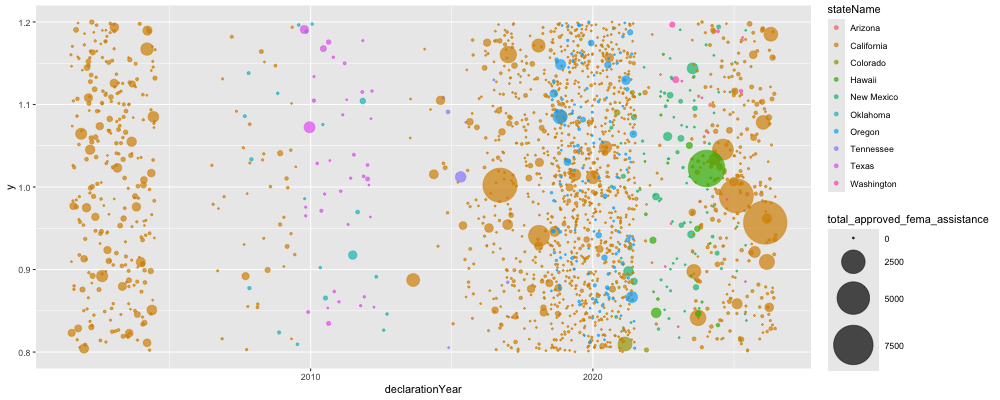

In [466]:
%%R -w 1000 -h 400

ggplot(df) + 
    aes(x=declarationYear, y=1, color=stateName, size=total_approved_fema_assistance) +
    geom_jitter(width = 1.5, height = 0.2, alpha = 0.7) +
    scale_size(range = c(0.5, 20)) 
    #facet_wrap(~stateName)

In [470]:
%%R

# Read data
df <- read_csv('fema_fire_assistance.csv')
df

Rows: 4298 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): disasterName, declarationType, stateCode, stateName, incidentType...
dbl  (31): zipCode, disasterNumber, sum_approvedForFemaAssistanceOwners, sum...
dttm  (8): declarationDate, incidentBeginDate, incidentEndDate, entryDate, u...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 4,298 × 49
   zipCode disasterNumber sum_approvedForFemaAssistance…¹ sum_totalApprovedIhp…²
     <dbl>          <dbl>                           <dbl>                  <dbl>
 1    1342           1810                               0                      0
 2    5246           4240                               0                      0
 3    5403           4344                              NA                     NA
 4   14368           4562                               0 

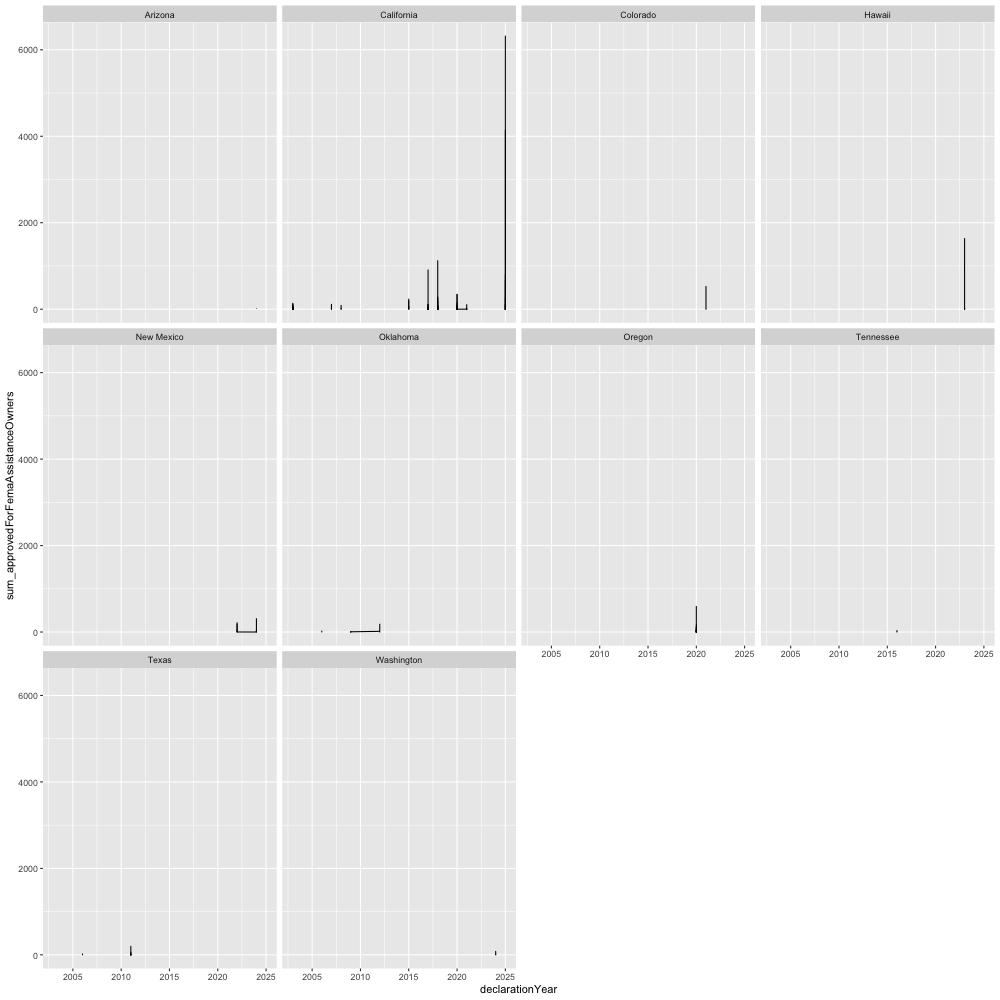

In [471]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x=declarationYear, y=sum_approvedForFemaAssistanceOwners) +
    geom_line() +
    facet_wrap(~stateName)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1171 rows containing missing values or values outside the scale range
(`geom_point()`). 



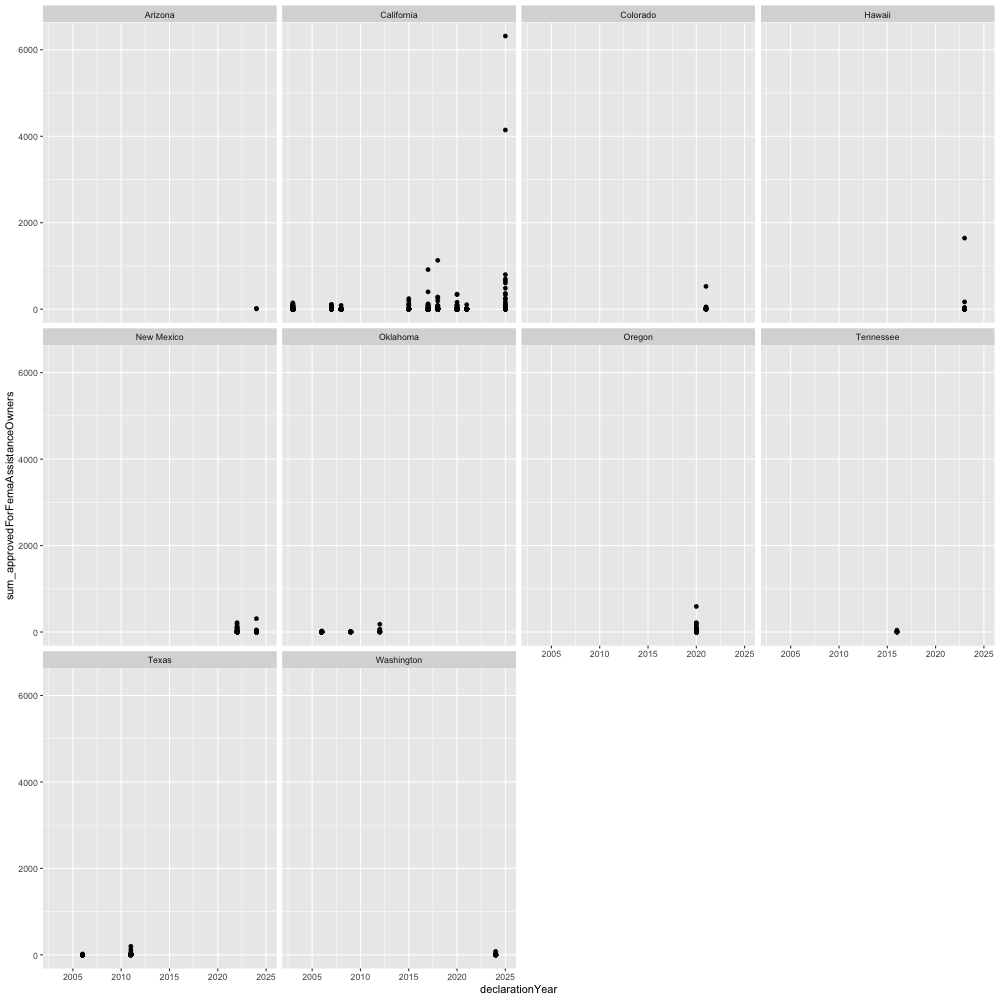

In [472]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x=declarationYear, y=sum_approvedForFemaAssistanceOwners) +
    geom_point() +
    facet_wrap(~stateName)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1071 rows containing missing values or values outside the scale range
(`geom_point()`). 



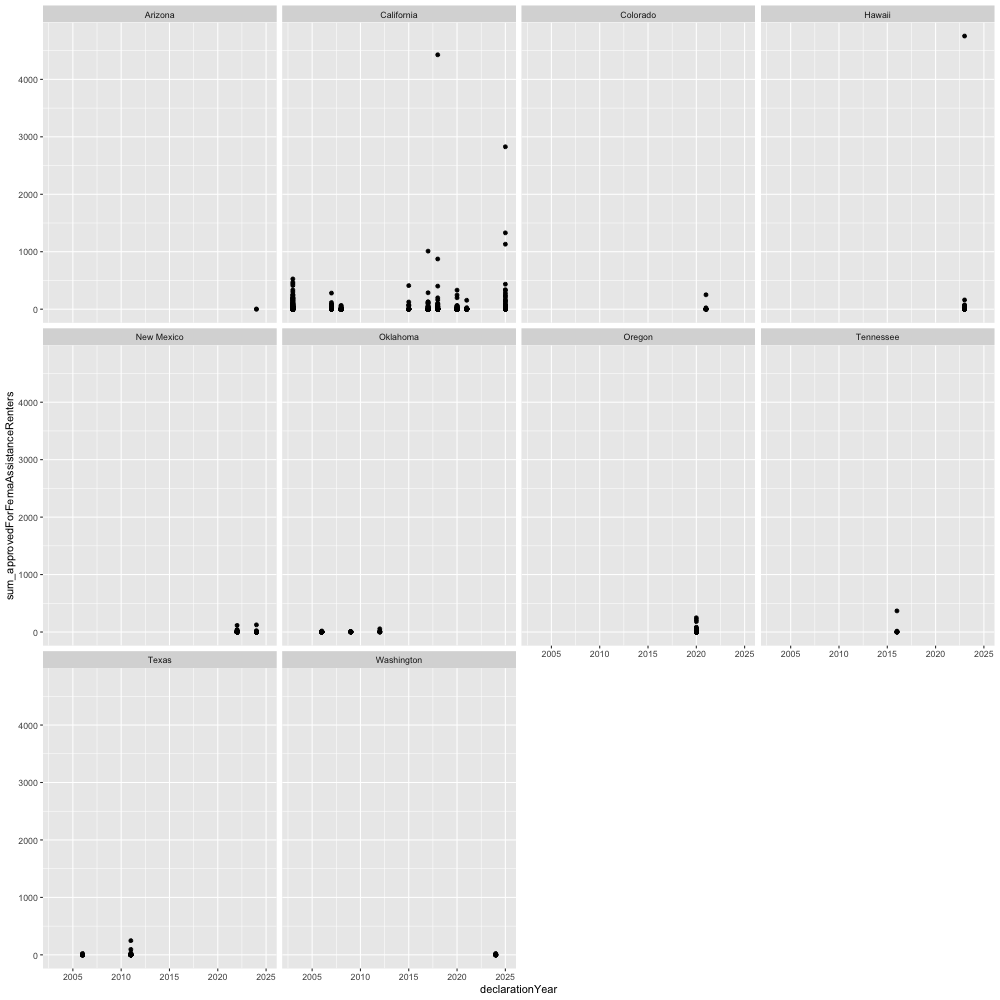

In [473]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x=declarationYear, y=sum_approvedForFemaAssistanceRenters) +
    geom_point() +
    facet_wrap(~stateName)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2242 rows containing missing values or values outside the scale range
(`geom_point()`). 



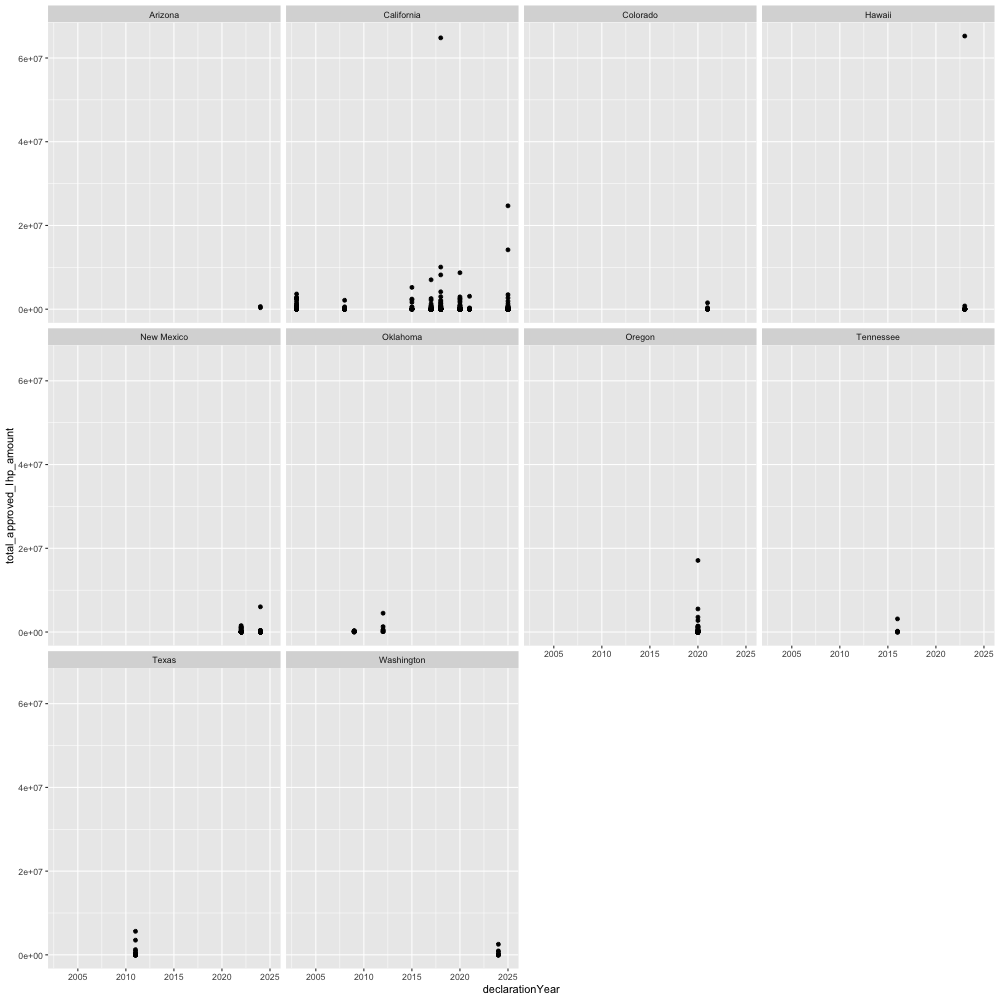

In [474]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x=declarationYear, y=total_approved_Ihp_amount) +
    geom_point() +
    facet_wrap(~stateName)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2242 rows containing missing values or values outside the scale range
(`geom_point()`). 



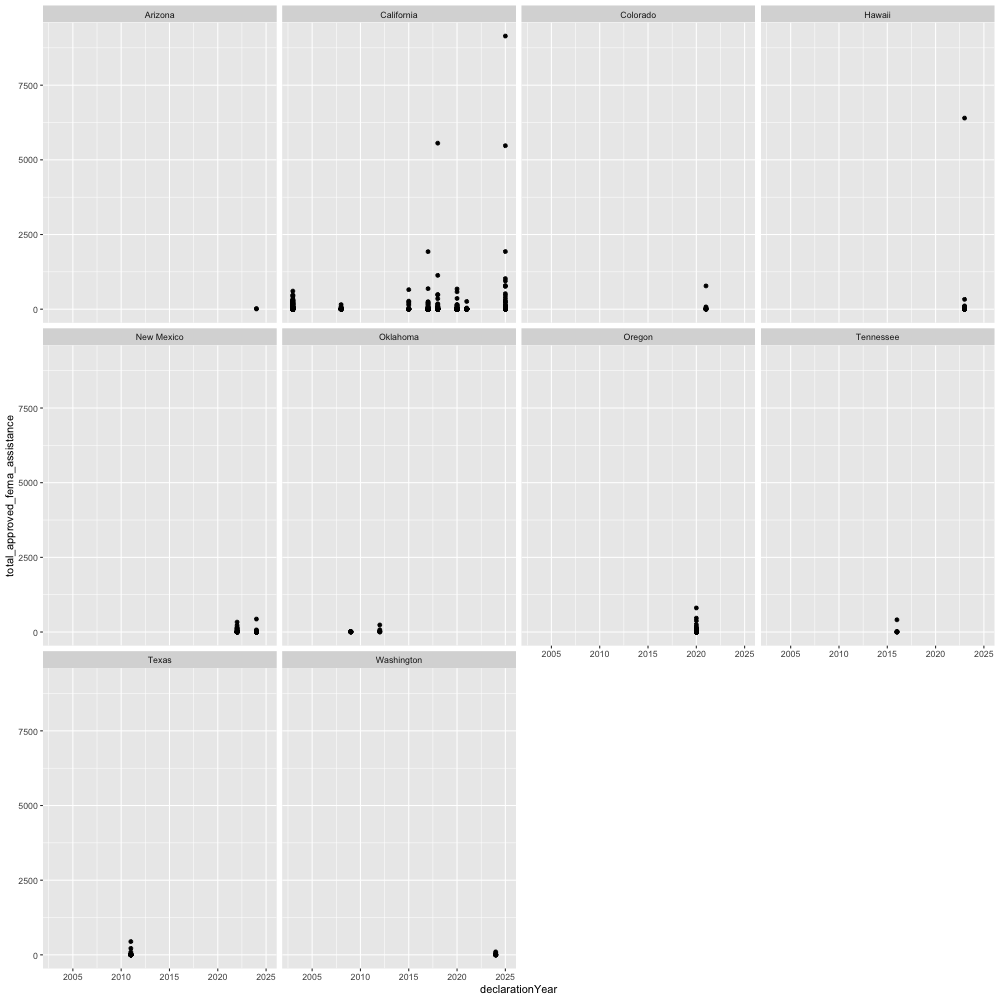

In [475]:
%%R -w 1000 -h 1000

ggplot(df) + 
    aes(x=declarationYear, y=total_approved_fema_assistance) +
    geom_point() +
    facet_wrap(~stateName)

## Below, I read in the disaster declarations dataset and create a sub-dataset for visualization that shows the number of disasters broken down by category per year.

In [533]:
df_disasters.head()

,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,id,hash,lastRefresh,year
0,4833,2024-10-04T00:00:00.000Z,WATCH FIRE,2024-07-10T00:00:00.000Z,2024-07-17T00:00:00.000Z,Major Disaster,AZ,Arizona,Fire,2024-10-04T00:00:00.000Z,2024-10-04T00:00:00.000Z,NaN,9,1.00,0.00,1.00,1.00,R,2024-08-16T00:00:00.000Z,96fac68f-e6b6-41d8-a083-d1e2ecb34e8f,8eeaf3a681cb24c83c412fcd6cda83c017d6a38b,2024-10-09T19:01:58.075Z,2024
1,4826,2024-09-26T00:00:00.000Z,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",2024-07-29T00:00:00.000Z,2024-07-31T00:00:00.000Z,Major Disaster,VT,Vermont,Flood,2024-09-26T00:00:00.000Z,2024-09-26T00:00:00.000Z,NaN,1,1.00,0.00,1.00,1.00,"F,M,W",2024-08-28T00:00:00.000Z,e6d2dd18-bbd9-46ec-95ae-07e657f9bb65,e9e169050a68c78af7cb774c3336f868e5e81b93,2024-10-09T19:01:58.075Z,2024
2,4824,2024-09-24T00:00:00.000Z,"SEVERE STORMS, STRAIGHT-LINE WINDS, TORNADOES,...",2024-06-26T00:00:00.000Z,2024-07-07T00:00:00.000Z,Major Disaster,KS,Kansas,Severe Storm,2024-09-24T00:00:00.000Z,2024-10-05T00:00:00.000Z,NaN,7,0.00,0.00,1.00,1.00,"2,F,T,W",2024-09-03T00:00:00.000Z,4ecc4167-17fe-4d9e-abab-26d5860688cb,cf01e983b5a015401184e6abfc1724c8fc8832e5,2024-10-09T19:01:58.075Z,2024
3,4823,2024-09-24T00:00:00.000Z,WILDFIRES,2024-06-22T00:00:00.000Z,2024-07-08T00:00:00.000Z,Major Disaster,WA,Washington,Fire,2024-09-24T00:00:00.000Z,2024-09-25T00:00:00.000Z,NaN,10,1.00,0.00,1.00,1.00,R,2024-08-26T00:00:00.000Z,90912f94-dcfe-4fe7-977b-4b6214f3863b,9694dbed3268d9b91fe2f8242a98974591cf72fb,2024-10-09T19:01:58.075Z,2024
4,4821,2024-09-24T00:00:00.000Z,TROPICAL STORM DEBBY,2024-08-04T00:00:00.000Z,2024-08-20T00:00:00.000Z,Major Disaster,GA,Georgia,Tropical Storm,2024-09-24T00:00:00.000Z,2024-09-24T00:00:00.000Z,NaN,4,1.00,0.00,1.00,1.00,"4,H",2024-09-10T00:00:00.000Z,56b58d52-0ea3-46e0-b61a-c44f7b108224,72e0fcd67e581baa2a8f4706b0cf1ac44898b7fa,2024-10-09T19:01:58.075Z,2024


In [ ]:
df_disasters['year'] = df_disasters['declarationDate'].str.extract(r'(\d{4})')

In [531]:
df_disasters[df_disasters['incidentType'] == 'Fire']['year'].value_counts(sort=False)

year
2024     69
2023     31
2022     34
2021     48
2020     82
2019     25
2018     57
2017     64
2016     51
2015     37
2014     35
2013     32
2012     52
2011    116
2010     18
2009     51
2008     54
2007     62
2006     89
2005     39
2004     44
2003     50
2002     71
2001     47
2000     67
1999     44
1998     57
1997      3
1996     80
1995      4
1994     20
1993      8
1992      8
1991      4
1990      6
1989      1
1988      7
1987      8
1986      1
1985     10
1984      4
1983      2
2025      5
1982      1
1981      5
1980      3
1979      7
1978      3
1977      6
1976      7
1975      2
1974      2
1973     10
1971      3
1970      3
1967      1
1961      1
1960      1
1956      1
1953      1
Name: count, dtype: int64

In [532]:
df_disasters[df_disasters['incidentType'] == 'Fire']['disasterNumber'].nunique()

1654

In [476]:
disaster_types = df_disasters.pivot_table(
    index='year',       
    columns='incidentType',         
    values=['disasterNumber'],  
    aggfunc='count',           
    fill_value=0           
)

disaster_types

disasterNumber                                                 \
incidentType     Biological Chemical Coastal Storm Dam/Levee Break Drought   
year                                                                         
1953                      0        0             0               0       0   
1954                      0        0             0               0       0   
1955                      0        0             0               0       0   
1956                      0        0             0               0       0   
1957                      0        0             0               0       0   
...                     ...      ...           ...             ...     ...   
2021                      2        0             1               0       0   
2022                      0        0             1               0       0   
2023                      0        0             0               0       0   
2024                      0        0             0               0       0   
2025                      0        0             0               0       0   

                                                                        \
incidentType Earthquake Fire Fishing Losses Flood Freezing Human Cause   
year                                                                     
1953                  0    1              0     5        0           0   
1954                  1    0              0     7        0           0   
1955                  0    0              0     8        0           0   
1956                  0    1              0     7        0           0   
1957                  0    0              0    10        0           0   
...                 ...  ...            ...   ...      ...         ...   
2021                  0   48              0     9        0           0   
2022                  0   34              0    11        0           0   
2023                  1   31              0    24        0           0   
2024                  0   69              0    20        0           0   
2025                  0    5              0     1        0           0   

                                                                          \
incidentType Hurricane Mud/Landslide Other Severe Ice Storm Severe Storm   
year                                                                       
1953                 0             0     1                0            0   
1954                 7             0     1                0            0   
1955                 7             0     1                0            0   
1956                 2             0     1                0            3   
1957                 2             0     1                0            0   
...                ...           ...   ...              ...          ...   
2021                23             1     4               11           14   
2022                 9             1     2                0           24   
2023                 8             1     2                0           30   
2024                11             3     0                0           44   
2025                 0             0     0                0            4   

                                                                               \
incidentType Snowstorm Straight-Line Winds Terrorist Tornado Toxic Substances   
year                                                                            
1953                 0                   0         0       6                0   
1954                 0                   0         0       1                0   
1955                 0                   0         0       1                0   
1956                 0                   0         0       2                0   
1957                 0                   0         0       3                0   
...                ...                 ...       ...     ...              ...   
2021                 1                   0         0       6                0   
2022    

In [ ]:
disaster_types.to_csv('disaster_types_by_year.csv')